# Working with the Main dataset

Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Loading the dataset csv into a DataFrame named 'df'

In [2]:
df = pd.read_csv('1805168.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140105686,SYSC us,2019-02-11 00:00:00,2019.0,2.960523e+09,2019-01-22,20190122,20190122,20190207.0,CAD,RV,1.0,NaN,2565.00,20190128.0,CA10,2.960523e+09,0
1,U001,0200769623,WAL-MAR systems,2019-03-05 00:00:00,2019.0,1.928845e+09,2019-02-23,20190222,20190223,20190310.0,USD,RV,1.0,NaN,60748.79,20190223.0,NAH4,1.928845e+09,0
2,U001,0200705742,DOT trust,2019-12-27 00:00:00,2019.0,1.930264e+09,2019-12-12,20191211,20191212,20191227.0,USD,RV,1.0,NaN,26333.93,20191212.0,NAA8,1.930264e+09,0
3,U001,0200769623,WAL-MAR corp,2019-07-12 00:00:00,2019.0,1.929538e+09,2019-06-25,20190625,20190625,20190710.0,USD,RV,1.0,NaN,8656.86,20190625.0,NAH4,1.929538e+09,0
4,U001,0200900909,SYSCO llc,2019-08-13 00:00:00,2019.0,1.929668e+09,2019-07-26,20190727,20190726,20190810.0,USD,RV,1.0,NaN,30877.00,20190726.0,NAA8,1.929668e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759878,SA us,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,18900.98,20200323.0,NAH4,1.930686e+09,1
49996,U001,0200230690,DECA us,NaN,2020.0,1.930804e+09,2020-04-21,20200421,20200421,20200509.0,USD,RV,1.0,NaN,118.32,20200416.0,NAM4,1.930804e+09,1
49997,U001,0200875680,MINERS us,NaN,2020.0,1.930753e+09,2020-04-06,20200406,20200406,20200421.0,USD,RV,1.0,NaN,25940.32,20200406.0,NAA8,1.930753e+09,1
49998,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930734e+09,2020-04-03,20200402,20200403,20200418.0,USD,RV,1.0,NaN,294.29,20200403.0,NAH4,1.930734e+09,1


# Data PreProcessing 1
# (null imputation, drop_duplicate, constant removal)

Checking the presence of null datas

In [3]:
[col for col in df.columns if df[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

Dropping all rows which have nan values in all features (if any)

In [4]:
df.dropna(how='all', axis = 0, inplace = True)
df.reset_index(drop=True, inplace = True)
df.shape

(50000, 19)

Dropping all the columns who have all the values as nan (area_business gets dropped)

In [5]:
df = df.dropna( axis = 1, how='all')
df.shape

(50000, 18)

Dropping columns which are 100% same (if any)

In [6]:
transposed = df.T
transposed.drop_duplicates(keep='first',inplace=True)
df.shape

(50000, 18)

Dropping duplicate rows (if any)

In [7]:
df = df.drop_duplicates(keep='first')
df.shape

(50000, 18)

After null imputation and droping duplicate checking if any more null values present in dataset

In [8]:
[col for col in df.columns if df[col].isnull().sum() > 0]

['clear_date', 'invoice_id']

Removing constant columns (posting_id gets dropped)

In [9]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, axis=1, inplace=True)
        
df.shape

(50000, 17)

# EDA 1 (Find all columns which are highly corelated)

<AxesSubplot:>

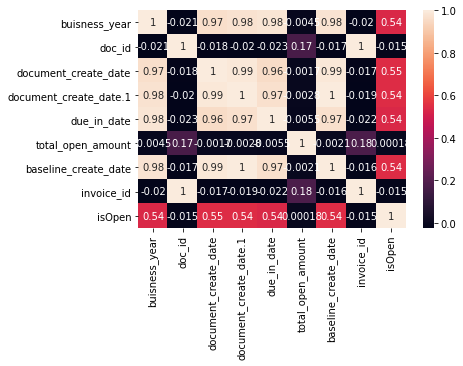

In [10]:
sns.heatmap(df.corr(),annot=True)

We see that doc_id and invoice_id have co-relation1 = 1

In [11]:
df.loc[df['doc_id']!=df['invoice_id']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
41,CA02,0140106054,TREE trust,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190224,20190306.0,CAD,X2,18277.92,20190224.0,CA10,NaN,0
2463,CA02,0140104409,LOB in,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-04-30,20190430,20190408,20190418.0,CAD,X2,454.44,20190408.0,CA10,NaN,0
3001,CA02,0140106054,TREE in,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190131,20190210.0,CAD,X2,216.80,20190131.0,CA10,NaN,0
24530,CA02,0140106054,TREE associates,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190213,20190223.0,CAD,X2,216.80,20190213.0,CA10,NaN,0
33333,CA02,0140104409,LOB us,2019-05-03 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190221,20190303.0,CAD,X2,912.44,20190221.0,CA10,NaN,0
33415,CA02,0140106054,TREE us,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190306,20190316.0,CAD,X2,1570.59,20190306.0,CA10,NaN,0
36013,CA02,0140106054,TREE systems,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190320,20190330.0,CAD,X2,45377.28,20190320.0,CA10,NaN,0


doc_id and invoice_id are same only those values are different where invoice id is nan so we can drop invoice id

In [12]:
df.drop(columns=['invoice_id'],inplace=True)
df.shape

(50000, 16)

We can see that baseline_create_date and document_create_date and document_create_date.1 have veri high corr (i.e above 095) so we can just keep one feature which is document_create_date.1 as it is the normalised one

In [13]:
df.drop(columns=['document_create_date','baseline_create_date'],inplace=True)
df.shape

(50000, 14)

# Data Preprocessing 2

# (DateTime conversion,Finding and removing all insgnificant rows and highly equivalent columns)

In [14]:
df['clear_date']= pd.to_datetime(df['clear_date'])
df['posting_date']= pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'].astype(str),format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'].astype(str),format='%Y%m%d')
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
cust_payment_terms                object
isOpen                             int64
dtype: object

sorting the dataframe according to document_create_date.1

In [15]:
df = df.sort_values(['document_create_date.1'],ascending=True)
df.reset_index(inplace = True,drop= True)

Removing all the rows where due_in_date < document_create_date.1

In [16]:
a = df.loc[df['due_in_date'] < df['document_create_date.1']].index
a

Int64Index([  866,  1037,  1073,  1188,  1214,  1471,  1715,  2415,  2474,
             2477,
            ...
            48174, 49124, 49286, 49444, 49562, 49635, 49686, 49695, 49709,
            49874],
           dtype='int64', length=149)

In [17]:
df.drop(a,axis=0,inplace=True)
df.shape

(49851, 14)

Checking if any rows have clear_date < document_create_date.1

In [18]:
df.loc[df['clear_date'] < df['document_create_date.1']].index

Int64Index([], dtype='int64')

Checking if any rows have clear_date < posting_date

In [19]:
df.loc[df['clear_date'] < df['posting_date']].index

Int64Index([], dtype='int64')

Removing all the rows where due_in_date < posting_date

In [20]:
b = df.loc[df['posting_date'] > df['due_in_date']].index
b

Int64Index([3305, 4670, 5660, 6016, 7294, 11222], dtype='int64')

In [21]:
df.drop(b,axis=0,inplace=True)
df.shape

(49845, 14)

In [22]:
df.loc[df['total_open_amount'] <0]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen


Finding all the posting date which is not same as document_create_date.1

In [23]:
df.loc[df['posting_date']!=df['document_create_date.1']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen
9016,CA02,0140106054,TREE systems,2019-05-31,2019.0,9.500000e+09,2019-03-29,2019-03-20,2019-03-30,CAD,X2,45377.28,CA10,0


If the loss of only 1 row data can reduce 1 redundant feature then we can delete the redundant feature

In [24]:
df.drop(columns=['posting_date'],inplace=True)
df.shape

(49845, 13)

In [25]:
df.nunique()

business_code                 6
cust_number                1447
name_customer              4388
clear_date                  405
buisness_year                 2
doc_id                    49845
document_create_date.1      500
due_in_date                 538
invoice_currency              2
document type                 2
total_open_amount         45056
cust_payment_terms           73
isOpen                        2
dtype: int64

We can see thatin nunique doc_id value = no of rows in df so it is different for all rows so we can remove it as model cannot predict anything (avoid overfit)

In [26]:
df.drop(columns=['doc_id'],inplace = True)
df.shape

(49845, 12)

In [27]:
df.reset_index(drop=True, inplace=True)

# Feature Engineering 1

# 1. delay 
(clear_date - due_in_date) target label!

delay is the feature which our model will predict

In [28]:
df['delay'] = df['clear_date'] - df['due_in_date']
df['delay'] = df['delay']/np.timedelta64(1,'D')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,8885.57,NAH4,0,-5.0
1,U001,0200759878,SA in,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,23758.87,NAH4,0,1.0
2,U001,0200955827,KE,2019-01-16,2019.0,2018-12-30,2019-01-14,USD,RV,32856.32,NAA8,0,2.0
3,U001,0200772670,ASSOCIAT foundation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,98118.31,NAU5,0,1.0
4,U001,0200759878,SA corporation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,18550.48,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49840,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,RV,8064.00,NA10,1,NaN
49841,U001,0200762950,HAR corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,RV,136025.60,NAA8,1,NaN
49842,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,RV,4025.00,NA10,1,NaN
49843,U001,200875680,MINERS corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,RV,77253.74,NAA8,1,NaN


In [29]:
df['delay'].describe()

count    46834.000000
mean         0.865205
std         10.670865
min        -91.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        187.000000
Name: delay, dtype: float64

# 2. total_open_amount.1
(converting cad to usd)

We can see that total open amount is in 2 different currency units (CAD, USD) we can bring them to a single unit. FInding the count of CAD and USD to convert into a suitable currency

In [30]:
a = df.loc[df['invoice_currency']=='CAD'].shape
b = df.loc[df['invoice_currency']=='USD'].shape
a,b

((3909, 13), (45936, 13))

We can see that invoice_currency has much more USD values than CAD so we can convert CAD to USD

In [31]:
def convert(x):
    if x['invoice_currency'] == 'CAD':
        return np.round(x['total_open_amount']*0.78, decimals=2)
    else:
        return x['total_open_amount']

df['total_open_amount.1'] = df.apply(convert,axis=1)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay,total_open_amount.1
0,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,8885.57,NAH4,0,-5.0,8885.57
1,U001,0200759878,SA in,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,23758.87,NAH4,0,1.0,23758.87
2,U001,0200955827,KE,2019-01-16,2019.0,2018-12-30,2019-01-14,USD,RV,32856.32,NAA8,0,2.0,32856.32
3,U001,0200772670,ASSOCIAT foundation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,98118.31,NAU5,0,1.0,98118.31
4,U001,0200759878,SA corporation,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,18550.48,NAH4,0,1.0,18550.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49840,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,RV,8064.00,NA10,1,NaN,8064.00
49841,U001,0200762950,HAR corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,RV,136025.60,NAA8,1,NaN,136025.60
49842,U001,0100036318,TFC associates,NaT,2020.0,2020-05-13,2020-05-23,USD,RV,4025.00,NA10,1,NaN,4025.00
49843,U001,200875680,MINERS corporation,NaT,2020.0,2020-05-13,2020-05-28,USD,RV,77253.74,NAA8,1,NaN,77253.74


Since total_open_amount.1 is successfully created now we have only 1 invoice currency so invoice_currency column is no longer required also total_open_amount is not required so we can drop them

In [32]:
df.drop(columns=['invoice_currency','total_open_amount'],inplace=True)
df.shape

(49845, 12)

In [33]:
df.describe()

,buisness_year,isOpen,delay,total_open_amount.1
count,49845.000000,49845.000000,46834.000000,4.984500e+04
mean,2019.183328,0.060407,0.865205,3.125811e+04
std,0.386939,0.238242,10.670865,3.694354e+04
min,2019.000000,0.000000,-91.000000,4.000000e-01
25%,2019.000000,0.000000,-3.000000,4.812360e+03
50%,2019.000000,0.000000,0.000000,1.718257e+04
75%,2019.000000,0.000000,2.000000,4.635825e+04
max,2020.000000,1.000000,187.000000,1.134400e+06


Converting timedelta format to float value by dividing 1 day from each delay

In [34]:
df.describe()

,buisness_year,isOpen,delay,total_open_amount.1
count,49845.000000,49845.000000,46834.000000,4.984500e+04
mean,2019.183328,0.060407,0.865205,3.125811e+04
std,0.386939,0.238242,10.670865,3.694354e+04
min,2019.000000,0.000000,-91.000000,4.000000e-01
25%,2019.000000,0.000000,-3.000000,4.812360e+03
50%,2019.000000,0.000000,0.000000,1.718257e+04
75%,2019.000000,0.000000,2.000000,4.635825e+04
max,2020.000000,1.000000,187.000000,1.134400e+06


In [35]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
document type                     object
cust_payment_terms                object
isOpen                             int64
delay                            float64
total_open_amount.1              float64
dtype: object

# Splitting the data into train, val1, val2 and test sets

Finding out the max and the min date in clear date for splitiing

In [36]:
print(df['clear_date'].min())
print(df['clear_date'].max())

2019-01-03 00:00:00
2020-05-21 00:00:00


Printing a sample of data for the last date to check if it null or not

In [37]:
df.loc[df['clear_date']=='2020-05-21']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,document type,cust_payment_terms,isOpen,delay,total_open_amount.1
41562,U001,0200726979,BJ'S associates,2020-05-21,2020.0,2020-01-08,2020-01-23,RV,NAA8,0,119.0,134.95
41649,U001,0200726979,BJ'S co,2020-05-21,2020.0,2020-01-08,2020-01-23,RV,NAA8,0,119.0,27.67
41677,U001,0200726979,BJ'S llc,2020-05-21,2020.0,2020-01-08,2020-01-23,RV,NAA8,0,119.0,59.29
41878,U001,200992849,GIV llc,2020-05-21,2020.0,2020-01-10,2020-05-09,RV,NAVL,0,12.0,31026.00
46364,CA02,140105686,SYSC in,2020-05-21,2020.0,2020-02-23,2020-03-13,RV,CA10,0,69.0,41369.98


Splitting the dataset into test set (The rows where clear_date has NaT values are included in test set)

In [38]:
x_test = df.loc[df['clear_date'].isna()]
print(x_test.shape)

(3011, 12)


The rest data where clear_date is not null is included in full train which ll futhere be divided into train val1 and val2

In [39]:
x_fulltrain =  df[df['clear_date'] <= '2020-05-21'].copy()
x_fulltrain.shape

(46834, 12)

Printing out the max and min values of document_create_date.1 in fulltrain because according to it rest data will be splitted into train val1 and val2

In [40]:
print(x_fulltrain['document_create_date.1'].min())
print(x_fulltrain['document_create_date.1'].max())

2018-12-30 00:00:00
2020-02-27 00:00:00


train set includes the rows execpt the last 3 months of document_create_date.1 and x_tem has rest 3 months which will further be splitted into val1 and val2

In [41]:
x_train=x_fulltrain[x_fulltrain['document_create_date.1'] <= '2019-11-27'].copy()
x_temp=x_fulltrain[x_fulltrain['document_create_date.1'] > '2019-11-27'].copy()
print(x_train.shape)
print(x_temp.shape)

(38669, 12)
(8165, 12)


splitting x_temp to x_val1 and x_val2 give 1.5 months of data to each

In [42]:
x_val1 = x_temp[x_temp['document_create_date.1'] <= '2020-01-12'].copy()
x_val2 = x_temp[x_temp['document_create_date.1'] > '2020-01-12'].copy()
print(x_val1.shape)
print(x_val2.shape)

(3397, 12)
(4768, 12)


Printing the shape of all the sucessful splits

In [43]:
print(x_train.shape)
print(x_val1.shape)
print(x_val2.shape)
print(x_test.shape)

(38669, 12)
(3397, 12)
(4768, 12)
(3011, 12)


# EDA2 (EDA on the train set)

# Univariate analysis

In [44]:
x_train.nunique()

business_code                 6
cust_number                1363
name_customer              3959
clear_date                  300
buisness_year                 1
document_create_date.1      333
due_in_date                 370
document type                 2
cust_payment_terms           68
isOpen                        1
delay                       179
total_open_amount.1       35161
dtype: int64

From nunique we can clearly see that business_year and isopen have value = 1 so we can remove them!

In [45]:
x_train.drop(columns=['buisness_year','isOpen'],inplace=True)
x_val1.drop(columns=['buisness_year','isOpen'],inplace=True)
x_val2.drop(columns=['buisness_year','isOpen'],inplace=True)
x_test.drop(columns=['buisness_year','isOpen'],inplace=True)

In [46]:
print(x_train.shape)
print(x_val1.shape)
print(x_val2.shape)
print(x_test.shape)

(38669, 10)
(3397, 10)
(4768, 10)
(3011, 10)


In [47]:
a= x_train.loc[x_train['document type']=='RV'].shape
b= x_train.loc[x_train['document type']=='X2'].shape
a,b

((38668, 10), (1, 10))

We can see that X2 is present in only 1 row in trainset indicating 'document type' as a quasi-constant column and should be dropped

In [48]:
x_train.drop(columns=['document type'],inplace=True)
x_val1.drop(columns=['document type'],inplace=True)
x_val2.drop(columns=['document type'],inplace=True)
x_test.drop(columns=['document type'],inplace=True)

In [49]:
print(x_train.shape)
print(x_val1.shape)
print(x_val2.shape)
print(x_test.shape)

(38669, 9)
(3397, 9)
(4768, 9)
(3011, 9)


finding how clear_date varries in every months

<AxesSubplot:xlabel='clear_date', ylabel='count'>

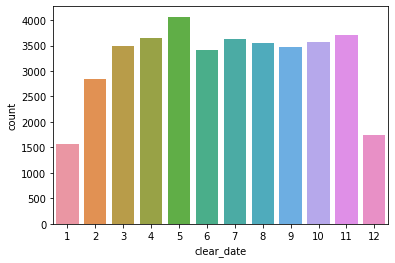

In [50]:
sns.countplot(x=x_train["clear_date"].dt.month)

maximum transactions are in may month

Finding if comapanies clear invoices on some particular days

<AxesSubplot:xlabel='clear_date', ylabel='count'>

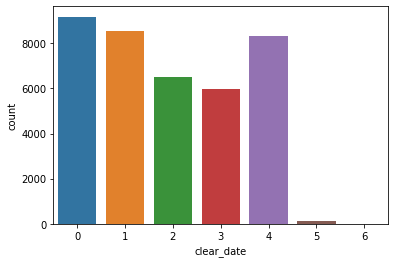

In [51]:
sns.countplot(x=x_train['clear_date'].dt.dayofweek)

we can clearly see that customers mostly do not clear invoices on weekends

# mean_delay_per_customer

In [52]:
mean_delay_map=dict(x_train.groupby(['cust_number']).delay.agg(["mean"])["mean"].round(6))
x_train["mean_delay_per_customer"]=x_train["cust_number"].map(mean_delay_map)
x_train

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1,mean_delay_per_customer
0,U001,0200769623,WAL-MAR,2019-01-09,2018-12-30,2019-01-14,NAH4,-5.0,8885.57,-2.223616
1,U001,0200759878,SA in,2019-01-15,2018-12-30,2019-01-14,NAH4,1.0,23758.87,0.973817
2,U001,0200955827,KE,2019-01-16,2018-12-30,2019-01-14,NAA8,2.0,32856.32,5.000000
3,U001,0200772670,ASSOCIAT foundation,2019-01-15,2018-12-30,2019-01-14,NAU5,1.0,98118.31,1.569527
4,U001,0200759878,SA corporation,2019-01-15,2018-12-30,2019-01-14,NAH4,1.0,18550.48,0.973817
...,...,...,...,...,...,...,...,...,...,...
38664,U001,0200508557,FOODL corporation,2019-12-13,2019-11-27,2019-12-12,NAA8,1.0,5147.45,1.611111
38665,U001,0200148860,DOLLA us,2019-12-12,2019-11-27,2019-12-12,NAA8,0.0,98160.77,-3.965116
38666,U001,0200707822,PUBLI foundation,2019-12-12,2019-11-27,2019-12-12,NAA8,0.0,127520.97,1.754159
38667,CA02,0100054351,UNF corporation,2019-12-24,2019-11-27,2019-12-08,CA10,16.0,5678.20,13.500000


<AxesSubplot:xlabel='mean_delay_per_customer', ylabel='delay'>

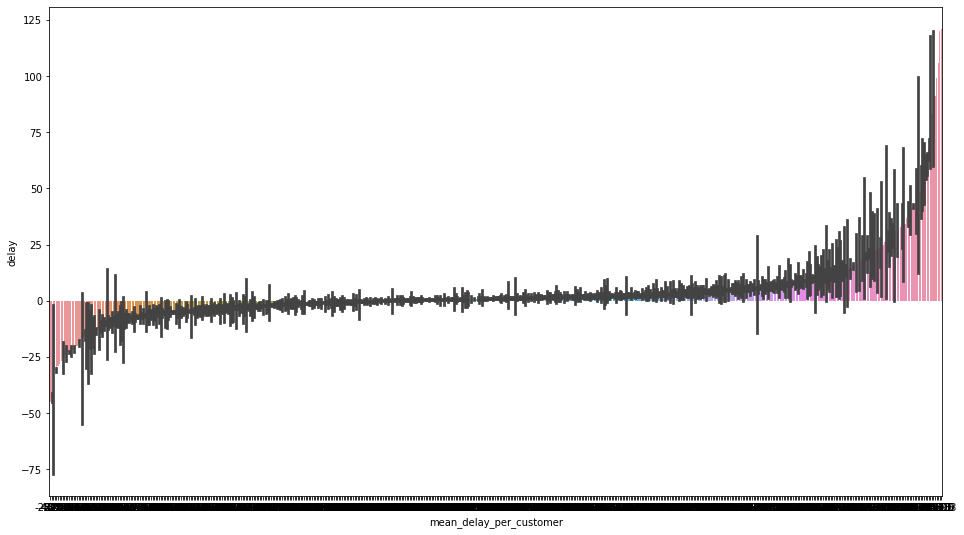

In [53]:
plt.figure(figsize=(16,9))
sns.barplot(x=x_train['mean_delay_per_customer'], y = x_train['delay'])

In [54]:
x_train.drop(columns = 'mean_delay_per_customer',inplace=True)

# Looking for outliers

<AxesSubplot:xlabel='total_open_amount.1'>

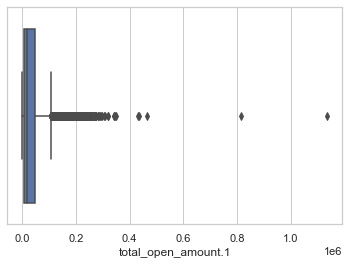

In [55]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=x_train['total_open_amount.1'])

In [56]:
x_train['total_open_amount.1'].describe()

count    3.866900e+04
mean     3.117891e+04
std      3.727795e+04
min      1.040000e+00
25%      4.773570e+03
50%      1.701406e+04
75%      4.611685e+04
max      1.134400e+06
Name: total_open_amount.1, dtype: float64

In [57]:
x_train.loc[x_train['total_open_amount.1']==1134400.14]

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1
6550,U001,0100058056,SIMPLO,2019-03-07,2019-03-01,2019-03-16,NAA8,-9.0,1134400.14


In [58]:
x_train.loc[x_train['cust_number']=='0100058056']

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1
6550,U001,0100058056,SIMPLO,2019-03-07,2019-03-01,2019-03-16,NAA8,-9.0,1134400.14
6650,U001,0100058056,SIMPLO corp,2019-03-07,2019-03-01,2019-03-16,NAA8,-9.0,223465.95
19621,U001,0100058056,SIMPLO corp,2019-07-02,2019-06-17,2019-07-02,NAA8,0.0,44098.08
22677,U001,0100058056,SIMPLO systems,2019-07-30,2019-07-12,2019-07-27,NAA8,3.0,133230.01


<AxesSubplot:xlabel='total_open_amount.1', ylabel='Density'>

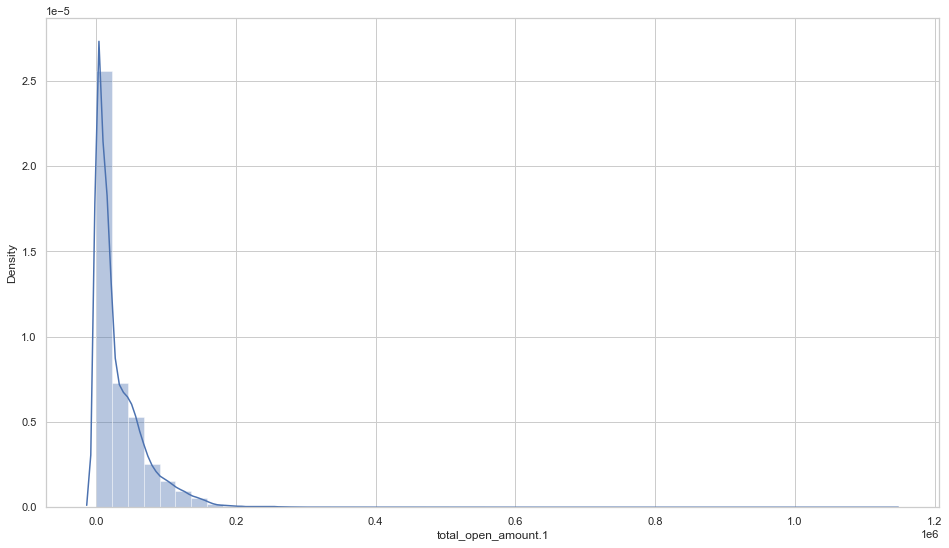

In [59]:
plt.figure(figsize=(16, 9))
sns.distplot(x_train["total_open_amount.1"])

The total_open_amount mostly lies in the lower range hence highly right-skewed we can say that we have to deal with low range invoices more

<AxesSubplot:xlabel='delay'>

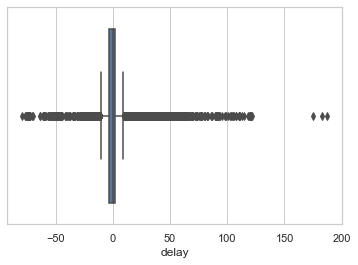

In [60]:
sns.boxplot(x=x_train['delay'])

In [61]:
x_train.loc[x_train['delay']>150]

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1
6521,U001,CCU013,KRAFT F associates,2019-08-30,2019-02-28,2019-02-28,NAX2,183.0,5125.00
10427,CA02,0140106181,THE trust,2019-10-17,2019-04-02,2019-04-13,CA10,187.0,7600.54
10662,U002,0200978592,PLAZA systems,2019-10-31,2019-04-04,2019-05-09,NAG2,175.0,818.09


# Multivariate Analysis

Looking if we can find any relaion or statistics from cust_number and name_customer

In [62]:
stats = x_train.groupby("cust_number")["name_customer"]
stats.value_counts()

cust_number  name_customer      
0100000048   GEOR in                 2
             GEOR                    1
0100000051   GREE                    1
             GREE associates         1
             GREE trust              1
                                    ..
CCU013       KRAFT F corp           52
             KRAFT F corporation    49
             KRAFT F associates     48
             KRAFT F us             47
             KRAFT F trust          46
Name: name_customer, Length: 5635, dtype: int64

We can clearly see that every different customer have different cust_number but customer's input there name differently
that being cust_number can uniquely identify customers so name_customer can be removed

In [63]:
x_train.drop(columns=['name_customer'],inplace=True)
x_val1.drop(columns=['name_customer'],inplace=True)
x_val2.drop(columns=['name_customer'],inplace=True)
x_test.drop(columns=['name_customer'],inplace=True)

#  mean_delay_per_payment_term

plotting the stripplot graph to check if mean_delay_per_payment_term will be useful

<AxesSubplot:xlabel='cust_payment_terms', ylabel='delay'>

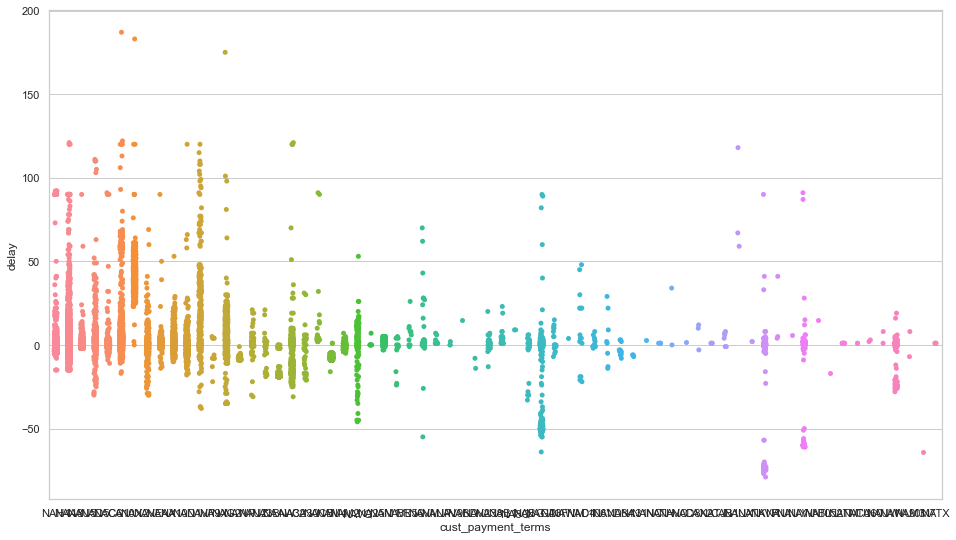

In [64]:
plt.figure(figsize=(16,9))
sns.stripplot(x="cust_payment_terms", y="delay", data=x_train)

# Feature Engineering (main)

# 1. deadline 
(due_in_date - documet_create_date)

In [65]:
x_train['deadline'] = x_train['due_in_date'] - x_train['document_create_date.1']
x_train['deadline'] = x_train['deadline'].astype('timedelta64[D]')
x_val1['deadline'] = x_val1['due_in_date'] - x_val1['document_create_date.1']
x_val1['deadline'] = x_val1['deadline'].astype('timedelta64[D]')
x_val2['deadline'] = x_val2['due_in_date'] - x_val2['document_create_date.1']
x_val2['deadline'] = x_val2['deadline'].astype('timedelta64[D]')
x_test['deadline'] = x_test['due_in_date'] - x_test['document_create_date.1']
x_test['deadline'] = x_test['deadline'].astype('timedelta64[D]')

# 2. due_month and due_date

<AxesSubplot:xlabel='due_in_date', ylabel='count'>

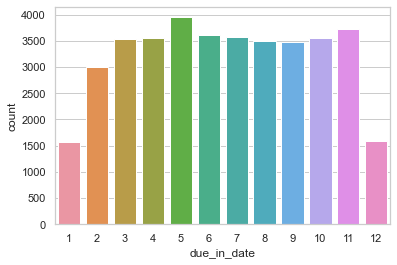

In [66]:
sns.countplot(x=x_train['due_in_date'].dt.month)

In [67]:
x_train["due_month"]=x_train["due_in_date"].dt.month
x_val1["due_month"]=x_val1["due_in_date"].dt.month
x_val2["due_month"]=x_val2["due_in_date"].dt.month
x_test["due_month"]=x_test["due_in_date"].dt.month

x_train["due_date"]=x_train["due_in_date"].dt.day
x_val1["due_date"]=x_val1["due_in_date"].dt.day
x_val2["due_date"]=x_val2["due_in_date"].dt.day
x_test["due_date"]=x_test["due_in_date"].dt.day

In [68]:
x_train.sample(10)

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1,deadline,due_month,due_date
23162,CA02,0140104409,2019-08-02,2019-07-17,2019-07-27,CA10,6.0,220594.33,10.0,7,27
9707,U001,0200744019,2019-05-30,2019-03-27,2019-05-31,NAGD,-1.0,4896.00,65.0,5,31
16446,U001,0200230690,2019-06-03,2019-05-21,2019-06-08,NAM4,-5.0,7526.93,18.0,6,8
17454,CA02,0140104409,2019-06-10,2019-05-30,2019-06-10,CA10,0.0,205940.59,11.0,6,10
25540,CA02,0140104225,2019-08-19,2019-08-07,2019-08-22,CA10,-3.0,6290.96,15.0,8,22
35042,U001,0200769623,2019-11-07,2019-10-28,2019-11-12,NAH4,-5.0,11061.98,15.0,11,12
29872,CA02,0140104409,2019-09-30,2019-09-13,2019-09-30,CA10,0.0,103873.34,17.0,9,30
15089,U001,0200762301,2019-05-24,2019-05-09,2019-05-24,NAC6,0.0,151612.67,15.0,5,24
37376,U001,0200762301,2019-12-03,2019-11-17,2019-12-02,NAC6,1.0,26904.95,15.0,12,2
17870,U001,0200792734,2019-06-17,2019-06-03,2019-06-18,NAA8,-1.0,121959.13,15.0,6,18


# 3. due_dayofweek

<AxesSubplot:xlabel='due_in_date', ylabel='count'>

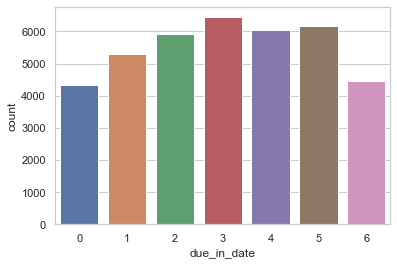

In [69]:
sns.countplot(x=x_train['due_in_date'].dt.dayofweek)

In [70]:
x_train["due_dayofweek"]=x_train["due_in_date"].dt.dayofweek
x_val1["due_dayofweek"]=x_val1["due_in_date"].dt.dayofweek
x_val2["due_dayofweek"]=x_val2["due_in_date"].dt.dayofweek
x_test["due_dayofweek"]=x_test["due_in_date"].dt.dayofweek

# 4. is_weekend
if due date is weekday or weekend

In [71]:
x_train["is_weekend"]= np.where((x_train["due_dayofweek"].between(0, 4)),  0, 1)
x_val1["is_weekend"]= np.where((x_val1["due_dayofweek"].between(0, 4)),  0, 1)
x_val2["is_weekend"]= np.where((x_val2["due_dayofweek"].between(0, 4)),  0, 1)
x_test["is_weekend"]= np.where((x_test["due_dayofweek"].between(0, 4)),  0, 1)

In [72]:
x_train["is_weekend"].value_counts()

0    28029
1    10640
Name: is_weekend, dtype: int64

# 5. mean_invoice_issue_perday
mean of invoices issued by a customer per day

In [73]:
basesum = x_train.groupby(["cust_number", "document_create_date.1"])['document_create_date.1'].agg(["count"])
basesum = pd.DataFrame(basesum)
basesum.reset_index(inplace=True)
basesum.rename(columns={'count':'invoicecount'}, inplace=True)
baseavg=basesum.groupby("cust_number").invoicecount.agg(["mean"]).round()
baseavg=pd.DataFrame(baseavg)
baseavg.rename(columns={'mean':'mean_invoice_issue'}, inplace=True)
mean_invoice_issue_map=dict(baseavg["mean_invoice_issue"])
x_train["mean_invoice_issue_perday"]=x_train["cust_number"].map(mean_invoice_issue_map)
x_train.head()

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday
0,U001,0200769623,2019-01-09,2018-12-30,2019-01-14,NAH4,-5.0,8885.57,15.0,1,14,0,0,25.0
1,U001,0200759878,2019-01-15,2018-12-30,2019-01-14,NAH4,1.0,23758.87,15.0,1,14,0,0,3.0
2,U001,0200955827,2019-01-16,2018-12-30,2019-01-14,NAA8,2.0,32856.32,15.0,1,14,0,0,1.0
3,U001,0200772670,2019-01-15,2018-12-30,2019-01-14,NAU5,1.0,98118.31,15.0,1,14,0,0,3.0
4,U001,0200759878,2019-01-15,2018-12-30,2019-01-14,NAH4,1.0,18550.48,15.0,1,14,0,0,3.0


In [74]:
basesum = x_val1.groupby(["cust_number", "document_create_date.1"])['document_create_date.1'].agg(["count"])
basesum = pd.DataFrame(basesum)
basesum.reset_index(inplace=True)
basesum.rename(columns={'count':'invoicecount'}, inplace=True)
baseavg=basesum.groupby("cust_number").invoicecount.agg(["mean"]).round()
baseavg=pd.DataFrame(baseavg)
baseavg.rename(columns={'mean':'mean_invoice_issue'}, inplace=True)
mean_invoice_issue_map=dict(baseavg["mean_invoice_issue"])
x_val1["mean_invoice_issue_perday"]=x_val1["cust_number"].map(mean_invoice_issue_map)

basesum = x_val2.groupby(["cust_number", "document_create_date.1"])['document_create_date.1'].agg(["count"])
basesum = pd.DataFrame(basesum)
basesum.reset_index(inplace=True)
basesum.rename(columns={'count':'invoicecount'}, inplace=True)
baseavg=basesum.groupby("cust_number").invoicecount.agg(["mean"]).round()
baseavg=pd.DataFrame(baseavg)
baseavg.rename(columns={'mean':'mean_invoice_issue'}, inplace=True)
mean_invoice_issue_map=dict(baseavg["mean_invoice_issue"])
x_val2["mean_invoice_issue_perday"]=x_val2["cust_number"].map(mean_invoice_issue_map)

basesum = x_test.groupby(["cust_number", "document_create_date.1"])['document_create_date.1'].agg(["count"])
basesum = pd.DataFrame(basesum)
basesum.reset_index(inplace=True)
basesum.rename(columns={'count':'invoicecount'}, inplace=True)
baseavg=basesum.groupby("cust_number").invoicecount.agg(["mean"]).round()
baseavg=pd.DataFrame(baseavg)
baseavg.rename(columns={'mean':'mean_invoice_issue'}, inplace=True)
mean_invoice_issue_map=dict(baseavg["mean_invoice_issue"])
x_test["mean_invoice_issue_perday"]=x_test["cust_number"].map(mean_invoice_issue_map)

x_val1.head()

,business_code,cust_number,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday
38669,U001,0200769623,2019-12-17,2019-11-28,2019-12-13,NAH4,4.0,67829.69,15.0,12,13,4,0,25.0
38670,U001,0200769623,2019-12-16,2019-11-28,2019-12-13,NAH4,3.0,70750.21,15.0,12,13,4,0,25.0
38671,U001,0200769623,2019-12-10,2019-11-28,2019-12-13,NAH4,-3.0,53905.12,15.0,12,13,4,0,25.0
38672,U001,0200799367,2019-12-13,2019-11-28,2019-12-13,NAA8,0.0,12424.26,15.0,12,13,4,0,2.0
38673,U001,0200418007,2019-12-13,2019-11-28,2019-12-13,NAA8,0.0,14682.80,15.0,12,13,4,0,2.0


# 6. business_code_labeled
label encoding all the codes

In [75]:
x_train["business_code"].unique()

array(['U001', 'CA02', 'U013', 'U005', 'U002', 'U007'], dtype=object)

In [76]:
business_code_labeled_map = {'U001':1, 'CA02':2, 'U013':3, 'U005':4, 'U002':5, 'U007':6}
x_train["business_code_labeled"] = x_train["business_code"].map(business_code_labeled_map)

In [77]:
x_val1["business_code_labeled"] = x_val1["business_code"].map(business_code_labeled_map)
x_val2["business_code_labeled"] = x_val2["business_code"].map(business_code_labeled_map)
x_test["business_code_labeled"] = x_test["business_code"].map(business_code_labeled_map)
x_train.drop(columns = 'business_code', inplace=True)
x_val1.drop(columns = 'business_code', inplace=True)
x_val2.drop(columns = 'business_code', inplace=True)
x_test.drop(columns = 'business_code', inplace=True)
x_val1

,cust_number,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled
38669,0200769623,2019-12-17,2019-11-28,2019-12-13,NAH4,4.0,67829.69,15.0,12,13,4,0,25.0,1
38670,0200769623,2019-12-16,2019-11-28,2019-12-13,NAH4,3.0,70750.21,15.0,12,13,4,0,25.0,1
38671,0200769623,2019-12-10,2019-11-28,2019-12-13,NAH4,-3.0,53905.12,15.0,12,13,4,0,25.0,1
38672,0200799367,2019-12-13,2019-11-28,2019-12-13,NAA8,0.0,12424.26,15.0,12,13,4,0,2.0,1
38673,0200418007,2019-12-13,2019-11-28,2019-12-13,NAA8,0.0,14682.80,15.0,12,13,4,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,0200466603,2020-01-27,2020-01-12,2020-01-27,NAA8,0.0,89859.08,15.0,1,27,0,0,1.0,1
42062,0200744019,2020-01-28,2020-01-12,2020-01-27,NAA8,1.0,30876.69,15.0,1,27,0,0,3.0,1
42063,0140105963,2020-02-06,2020-01-12,2020-01-23,CA10,14.0,26791.65,11.0,1,23,3,0,1.0,2
42064,0200726979,2020-01-27,2020-01-12,2020-01-27,NAA8,0.0,245.11,15.0,1,27,0,0,4.0,1


# 7. region_other_than_NA
if region is NA fill 0 else fill 1

In [78]:
def is_na(x):
    if x.startswith('NA'):
        return 0
    else:
        return 1

x_train['region_other_than_NA'] = x_train['cust_payment_terms'].apply(is_na)
x_val1['region_other_than_NA'] = x_val1['cust_payment_terms'].apply(is_na)
x_val2['region_other_than_NA'] = x_val2['cust_payment_terms'].apply(is_na)
x_test['region_other_than_NA'] = x_test['cust_payment_terms'].apply(is_na)
x_train.sample(10)

,cust_number,clear_date,document_create_date.1,due_in_date,cust_payment_terms,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA
5650,0100028450,2019-03-05,2019-02-21,2019-03-03,NA10,2.0,25558.75,10.0,3,3,6,1,1.0,1,0
31902,0200762950,2019-10-16,2019-10-01,2019-10-16,NAA8,0.0,50575.49,15.0,10,16,2,0,1.0,1,0
14254,0200763152,2019-05-10,2019-05-03,2019-05-18,NAA8,-8.0,46411.22,15.0,5,18,5,1,1.0,1,0
3800,0200769623,2019-02-20,2019-02-06,2019-02-21,NAH4,-1.0,26984.27,15.0,2,21,3,0,25.0,1,0
14543,0200769623,2019-05-23,2019-05-06,2019-05-21,NAH4,2.0,198.03,15.0,5,21,1,0,25.0,1,0
16422,0200769623,2019-05-31,2019-05-21,2019-06-05,NAH4,-5.0,531.00,15.0,6,5,2,0,25.0,1,0
15517,0200974851,2019-06-04,2019-05-14,2019-05-29,NAA8,6.0,2634.61,15.0,5,29,2,0,2.0,1,0
30059,0200799367,2019-09-30,2019-09-15,2019-09-30,NAA8,0.0,14985.69,15.0,9,30,0,0,2.0,1,0
35085,0140105686,2019-11-14,2019-10-29,2019-11-09,CA10,5.0,6352.87,11.0,11,9,5,1,2.0,2,1
22491,0200705089,2019-07-26,2019-07-11,2019-07-26,NAA8,0.0,1562.58,15.0,7,26,4,0,1.0,1,0


# 8. cust_payment_term_labeled

cust_payment_term has 68  different values which can be easily labeled

In [79]:
df["cust_payment_terms"].unique()

array(['NAH4', 'NAA8', 'NAU5', 'NAD5', 'NAC6', 'CA10', 'NAX2', 'NAVE',
       'NAAX', 'NA10', 'NAD1', 'NAVF', 'NA9X', 'NAG2', 'NAWP', 'NAUZ',
       'NA3B', 'NAAW', 'NA32', 'CA30', 'NACB', 'NAM4', 'NAM2', 'NAVQ',
       'NA25', 'NAM1', 'NAVL', 'BR56', 'NAVM', 'NAUP', 'NAV9', 'NABD',
       'NAV2', 'NA38', 'NAB1', 'NA8Q', 'NABG', 'NAGD', 'NA3F', 'NAWM',
       'NAD4', 'C106', 'NAVD', 'NA84', 'NA31', 'NANC', 'NATH', 'NAVC',
       'NAD8', 'CAX2', 'NATJ', 'CAB1', 'NAUX', 'NATK', 'NAVR', 'NAUI',
       'NAUY', 'NAWN', 'NATL', 'B052', 'NATM', 'NATU', 'CA60', 'NAUW',
       'NAWU', 'NAM3', '90M7', 'NATX', 'NAUN', 'NATZ', 'NACE', 'NACG',
       'C129'], dtype=object)

In [80]:
df["cust_payment_terms"].nunique()

73

In [81]:
keys = ['NAH4', 'NAA8', 'NAU5', 'NAD5', 'NAC6', 'CA10', 'NAX2', 'NAVE',
       'NAAX', 'NA10', 'NAD1', 'NAVF', 'NA9X', 'NAG2', 'NAWP', 'NAUZ',
       'NA3B', 'NAAW', 'NA32', 'CA30', 'NACB', 'NAM4', 'NAM2', 'NAVQ',
       'NA25', 'NAM1', 'NAVL', 'BR56', 'NAVM', 'NAUP', 'NAV9', 'NABD',
       'NAV2', 'NA38', 'NAB1', 'NA8Q', 'NABG', 'NAGD', 'NA3F', 'NAWM',
       'NAD4', 'C106', 'NAVD', 'NA84', 'NA31', 'NANC', 'NATH', 'NAVC',
       'NAD8', 'CAX2', 'NATJ', 'CAB1', 'NAUX', 'NATK', 'NAVR', 'NAUI',
       'NAUY', 'NAWN', 'NATL', 'B052', 'NATM', 'NATU', 'CA60', 'NAUW',
       'NAWU', 'NAM3', '90M7', 'NATX', 'NAUN', 'NATZ', 'NACE', 'NACG',
       'C129']
values = range(1,df["cust_payment_terms"].nunique()+1)
payment_term_labeled_map = dict(zip(keys,values))
x_train["cust_payment_term_labeled"] = x_train["cust_payment_terms"].map(payment_term_labeled_map)

In [82]:
x_val1["cust_payment_term_labeled"] = x_val1["cust_payment_terms"].map(payment_term_labeled_map)
x_val1["cust_payment_term_labeled"].fillna(x_val1.cust_payment_term_labeled.median())
x_val2["cust_payment_term_labeled"] = x_val2["cust_payment_terms"].map(payment_term_labeled_map)
x_val2["cust_payment_term_labeled"].fillna(x_val2.cust_payment_term_labeled.median())
x_test["cust_payment_term_labeled"] = x_test["cust_payment_terms"].map(payment_term_labeled_map)
x_test["cust_payment_term_labeled"].fillna(x_test.cust_payment_term_labeled.median())
x_train.drop(columns = 'cust_payment_terms', inplace=True)
x_val1.drop(columns = 'cust_payment_terms', inplace=True)
x_val2.drop(columns = 'cust_payment_terms', inplace=True)
x_test.drop(columns = 'cust_payment_terms', inplace=True)
x_val1

,cust_number,clear_date,document_create_date.1,due_in_date,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled
38669,0200769623,2019-12-17,2019-11-28,2019-12-13,4.0,67829.69,15.0,12,13,4,0,25.0,1,0,1
38670,0200769623,2019-12-16,2019-11-28,2019-12-13,3.0,70750.21,15.0,12,13,4,0,25.0,1,0,1
38671,0200769623,2019-12-10,2019-11-28,2019-12-13,-3.0,53905.12,15.0,12,13,4,0,25.0,1,0,1
38672,0200799367,2019-12-13,2019-11-28,2019-12-13,0.0,12424.26,15.0,12,13,4,0,2.0,1,0,2
38673,0200418007,2019-12-13,2019-11-28,2019-12-13,0.0,14682.80,15.0,12,13,4,0,2.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,0200466603,2020-01-27,2020-01-12,2020-01-27,0.0,89859.08,15.0,1,27,0,0,1.0,1,0,2
42062,0200744019,2020-01-28,2020-01-12,2020-01-27,1.0,30876.69,15.0,1,27,0,0,3.0,1,0,2
42063,0140105963,2020-02-06,2020-01-12,2020-01-23,14.0,26791.65,11.0,1,23,3,0,1.0,2,1,6
42064,0200726979,2020-01-27,2020-01-12,2020-01-27,0.0,245.11,15.0,1,27,0,0,4.0,1,0,2


<AxesSubplot:xlabel='cust_payment_term_labeled', ylabel='total_open_amount.1'>

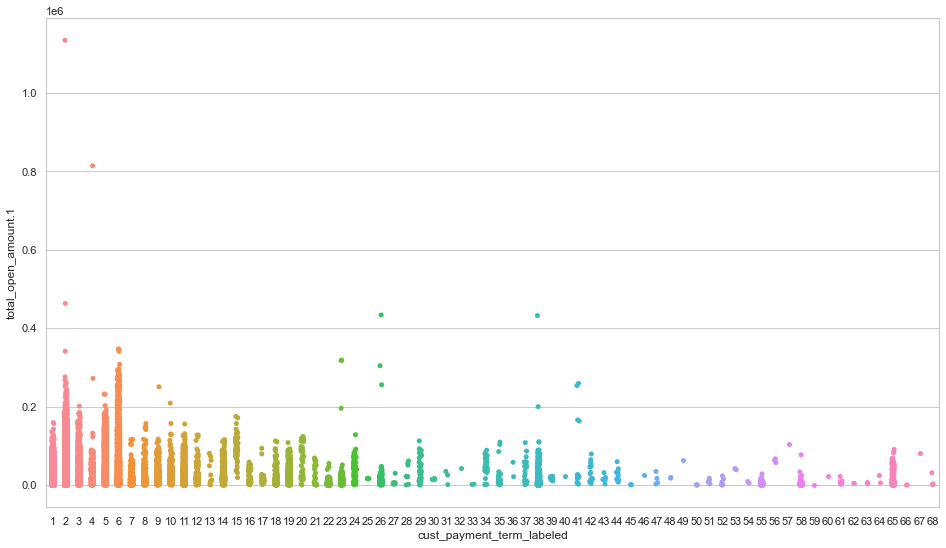

In [83]:
plt.figure(figsize=(16,9))
sns.stripplot(x="cust_payment_term_labeled", y="total_open_amount.1", data=x_train)

# 9. mean_amount_per_cust

In [84]:
mean_amount_per_cust_map=dict(x_train.groupby("cust_number")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_train["mean_amount_per_cust"]=x_train["cust_number"].map(mean_amount_per_cust_map)

In [85]:
mean_amount_per_cust_map=dict(x_val1.groupby("cust_number")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_val1["mean_amount_per_cust"]=x_val1["cust_number"].map(mean_amount_per_cust_map)

mean_amount_per_cust_map=dict(x_val2.groupby("cust_number")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_val2["mean_amount_per_cust"]=x_val2["cust_number"].map(mean_amount_per_cust_map)

mean_amount_per_cust_map=dict(x_test.groupby("cust_number")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_test["mean_amount_per_cust"]=x_test["cust_number"].map(mean_amount_per_cust_map)

x_val1

,cust_number,clear_date,document_create_date.1,due_in_date,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust
38669,0200769623,2019-12-17,2019-11-28,2019-12-13,4.0,67829.69,15.0,12,13,4,0,25.0,1,0,1,23573.54
38670,0200769623,2019-12-16,2019-11-28,2019-12-13,3.0,70750.21,15.0,12,13,4,0,25.0,1,0,1,23573.54
38671,0200769623,2019-12-10,2019-11-28,2019-12-13,-3.0,53905.12,15.0,12,13,4,0,25.0,1,0,1,23573.54
38672,0200799367,2019-12-13,2019-11-28,2019-12-13,0.0,12424.26,15.0,12,13,4,0,2.0,1,0,2,48206.85
38673,0200418007,2019-12-13,2019-11-28,2019-12-13,0.0,14682.80,15.0,12,13,4,0,2.0,1,0,2,24640.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,0200466603,2020-01-27,2020-01-12,2020-01-27,0.0,89859.08,15.0,1,27,0,0,1.0,1,0,2,97498.93
42062,0200744019,2020-01-28,2020-01-12,2020-01-27,1.0,30876.69,15.0,1,27,0,0,3.0,1,0,2,22285.47
42063,0140105963,2020-02-06,2020-01-12,2020-01-23,14.0,26791.65,11.0,1,23,3,0,1.0,2,1,6,25917.18
42064,0200726979,2020-01-27,2020-01-12,2020-01-27,0.0,245.11,15.0,1,27,0,0,4.0,1,0,2,3166.70


# 10. mean_amount_per_payterm

In [86]:
mean_amount_per_cust_map=dict(x_train.groupby("cust_payment_term_labeled")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_train["mean_amount_per_payterm"]=x_train["cust_payment_term_labeled"].map(mean_amount_per_cust_map)

mean_amount_per_cust_map=dict(x_val1.groupby("cust_payment_term_labeled")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_val1["mean_amount_per_payterm"]=x_val1["cust_payment_term_labeled"].map(mean_amount_per_cust_map)

mean_amount_per_cust_map=dict(x_val2.groupby("cust_payment_term_labeled")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_val2["mean_amount_per_payterm"]=x_val2["cust_payment_term_labeled"].map(mean_amount_per_cust_map)

mean_amount_per_cust_map=dict(x_test.groupby("cust_payment_term_labeled")['total_open_amount.1'].agg(["mean"])["mean"].round(2))
x_test["mean_amount_per_payterm"]=x_test["cust_payment_term_labeled"].map(mean_amount_per_cust_map)

x_val1

,cust_number,clear_date,document_create_date.1,due_in_date,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm
38669,0200769623,2019-12-17,2019-11-28,2019-12-13,4.0,67829.69,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64
38670,0200769623,2019-12-16,2019-11-28,2019-12-13,3.0,70750.21,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64
38671,0200769623,2019-12-10,2019-11-28,2019-12-13,-3.0,53905.12,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64
38672,0200799367,2019-12-13,2019-11-28,2019-12-13,0.0,12424.26,15.0,12,13,4,0,2.0,1,0,2,48206.85,39563.48
38673,0200418007,2019-12-13,2019-11-28,2019-12-13,0.0,14682.80,15.0,12,13,4,0,2.0,1,0,2,24640.45,39563.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,0200466603,2020-01-27,2020-01-12,2020-01-27,0.0,89859.08,15.0,1,27,0,0,1.0,1,0,2,97498.93,39563.48
42062,0200744019,2020-01-28,2020-01-12,2020-01-27,1.0,30876.69,15.0,1,27,0,0,3.0,1,0,2,22285.47,39563.48
42063,0140105963,2020-02-06,2020-01-12,2020-01-23,14.0,26791.65,11.0,1,23,3,0,1.0,2,1,6,25917.18,50440.73
42064,0200726979,2020-01-27,2020-01-12,2020-01-27,0.0,245.11,15.0,1,27,0,0,4.0,1,0,2,3166.70,39563.48


# 11. create_month

<AxesSubplot:xlabel='document_create_date.1', ylabel='count'>

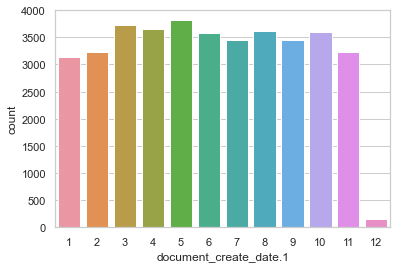

In [87]:
sns.countplot(x=x_train['document_create_date.1'].dt.month)

In [88]:
x_train["create_month"]=x_train["document_create_date.1"].dt.month
x_val1["create_month"]=x_val1["document_create_date.1"].dt.month
x_val2["create_month"]=x_val2["document_create_date.1"].dt.month
x_test["create_month"]=x_test["document_create_date.1"].dt.month
x_val1

,cust_number,clear_date,document_create_date.1,due_in_date,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month
38669,0200769623,2019-12-17,2019-11-28,2019-12-13,4.0,67829.69,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64,11
38670,0200769623,2019-12-16,2019-11-28,2019-12-13,3.0,70750.21,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64,11
38671,0200769623,2019-12-10,2019-11-28,2019-12-13,-3.0,53905.12,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64,11
38672,0200799367,2019-12-13,2019-11-28,2019-12-13,0.0,12424.26,15.0,12,13,4,0,2.0,1,0,2,48206.85,39563.48,11
38673,0200418007,2019-12-13,2019-11-28,2019-12-13,0.0,14682.80,15.0,12,13,4,0,2.0,1,0,2,24640.45,39563.48,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,0200466603,2020-01-27,2020-01-12,2020-01-27,0.0,89859.08,15.0,1,27,0,0,1.0,1,0,2,97498.93,39563.48,1
42062,0200744019,2020-01-28,2020-01-12,2020-01-27,1.0,30876.69,15.0,1,27,0,0,3.0,1,0,2,22285.47,39563.48,1
42063,0140105963,2020-02-06,2020-01-12,2020-01-23,14.0,26791.65,11.0,1,23,3,0,1.0,2,1,6,25917.18,50440.73,1
42064,0200726979,2020-01-27,2020-01-12,2020-01-27,0.0,245.11,15.0,1,27,0,0,4.0,1,0,2,3166.70,39563.48,1


# Feature Selection

In [89]:
x_train

,cust_number,clear_date,document_create_date.1,due_in_date,delay,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,-5.0,8885.57,15.0,1,14,0,0,25.0,1,0,1,22277.90,23214.94,12
1,0200759878,2019-01-15,2018-12-30,2019-01-14,1.0,23758.87,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12
2,0200955827,2019-01-16,2018-12-30,2019-01-14,2.0,32856.32,15.0,1,14,0,0,1.0,1,0,2,28990.66,37264.06,12
3,0200772670,2019-01-15,2018-12-30,2019-01-14,1.0,98118.31,15.0,1,14,0,0,3.0,1,0,3,41489.51,42822.29,12
4,0200759878,2019-01-15,2018-12-30,2019-01-14,1.0,18550.48,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38664,0200508557,2019-12-13,2019-11-27,2019-12-12,1.0,5147.45,15.0,12,12,3,0,2.0,1,0,2,3430.17,37264.06,11
38665,0200148860,2019-12-12,2019-11-27,2019-12-12,0.0,98160.77,15.0,12,12,3,0,2.0,1,0,2,45148.92,37264.06,11
38666,0200707822,2019-12-12,2019-11-27,2019-12-12,0.0,127520.97,15.0,12,12,3,0,2.0,1,0,2,71353.51,37264.06,11
38667,0100054351,2019-12-24,2019-11-27,2019-12-08,16.0,5678.20,11.0,12,8,6,1,1.0,2,1,6,4220.50,44721.58,11


storing due_in_date in different variable which will be useful later for finding clear_date

In [90]:
due_date_train = x_train['due_in_date']
due_date_val1 = x_val1['due_in_date']
due_date_val2 = x_val2['due_in_date']
due_date_test = x_test['due_in_date']

dropping declined cloumns and creating y_train, y_val1, y_val2

In [91]:
y_train = x_train['delay']
x_train.drop(columns = ['cust_number','clear_date','document_create_date.1','due_in_date','delay'],inplace=True)

y_val1 = x_val1['delay']
x_val1.drop(columns = ['cust_number','clear_date','document_create_date.1','due_in_date','delay'],inplace=True)

y_val2 = x_val2['delay']
x_val2.drop(columns = ['cust_number','clear_date','document_create_date.1','due_in_date','delay'],inplace=True)

x_test.drop(columns = ['cust_number','clear_date','document_create_date.1','due_in_date','delay'],inplace=True)

In [92]:
x_train

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month
0,8885.57,15.0,1,14,0,0,25.0,1,0,1,22277.90,23214.94,12
1,23758.87,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12
2,32856.32,15.0,1,14,0,0,1.0,1,0,2,28990.66,37264.06,12
3,98118.31,15.0,1,14,0,0,3.0,1,0,3,41489.51,42822.29,12
4,18550.48,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38664,5147.45,15.0,12,12,3,0,2.0,1,0,2,3430.17,37264.06,11
38665,98160.77,15.0,12,12,3,0,2.0,1,0,2,45148.92,37264.06,11
38666,127520.97,15.0,12,12,3,0,2.0,1,0,2,71353.51,37264.06,11
38667,5678.20,11.0,12,8,6,1,1.0,2,1,6,4220.50,44721.58,11


In [93]:
x_val1

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month
38669,67829.69,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64,11
38670,70750.21,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64,11
38671,53905.12,15.0,12,13,4,0,25.0,1,0,1,23573.54,24245.64,11
38672,12424.26,15.0,12,13,4,0,2.0,1,0,2,48206.85,39563.48,11
38673,14682.80,15.0,12,13,4,0,2.0,1,0,2,24640.45,39563.48,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42061,89859.08,15.0,1,27,0,0,1.0,1,0,2,97498.93,39563.48,1
42062,30876.69,15.0,1,27,0,0,3.0,1,0,2,22285.47,39563.48,1
42063,26791.65,11.0,1,23,3,0,1.0,2,1,6,25917.18,50440.73,1
42064,245.11,15.0,1,27,0,0,4.0,1,0,2,3166.70,39563.48,1


<AxesSubplot:>

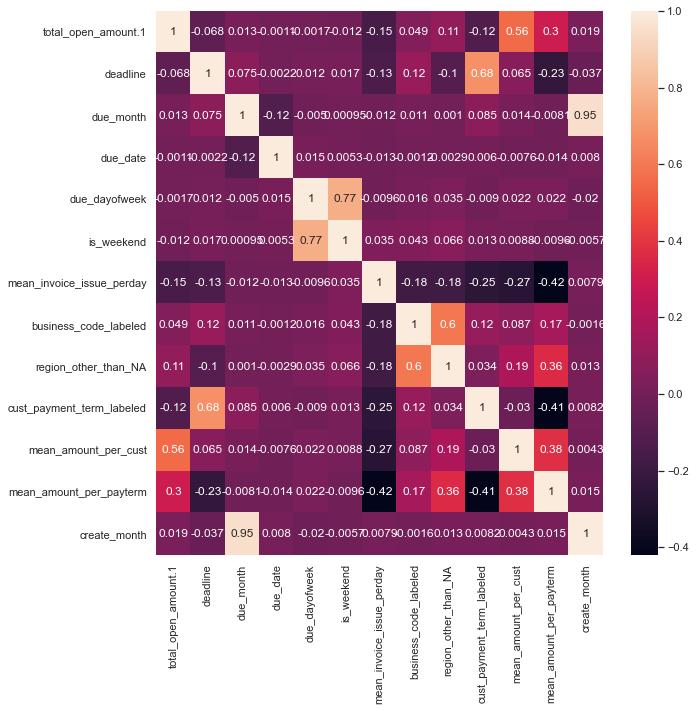

In [94]:
plt.figure(figsize=(10, 10))
sns.heatmap(x_train.corr(),annot=True)

# Modeling

In [95]:
MSE_Score_val1 = []
RMSE_Score_val1 = []
R2_Score_val1 = []
MSE_Score_val2 = []
RMSE_Score_val2 = []
R2_Score_val2 = []
Algorithm = []

In [96]:
[col for col in x_val1.columns if x_val1[col].isnull().sum() > 0]

[]

# Linear Regression

In [97]:
# Fitting Simple Linear Regression to the Training Se
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)
MSE_Score_val1.append(mean_squared_error(y_val1, predicted))
R2_Score_val1.append(r2_score(y_val1, predicted))

# Predicting the val1 Set Results
predicted = clf.predict(x_val2)
MSE_Score_val2.append(mean_squared_error(y_val2, predicted))

In [98]:
print(MSE_Score_val1)
print(MSE_Score_val2)

[57.294116603316034]
[82.48807206416151]


# Decision Tree regressor

In [99]:
# Fitting Simple Decision Tree Regressor to the Training Se
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)
MSE_Score_val1.append(mean_squared_error(y_val1, predicted))
R2_Score_val1.append(r2_score(y_val1, predicted))

# Predicting the val1 Set Results
predicted = clf.predict(x_val2)
MSE_Score_val2.append(mean_squared_error(y_val2, predicted))

In [100]:
print(MSE_Score_val1)
print(MSE_Score_val2)

[57.294116603316034, 84.70551630523664]
[82.48807206416151, 188.8793402777778]


# Support Vector Regressor

In [101]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)
MSE_Score_val1.append(mean_squared_error(y_val1, predicted))
R2_Score_val1.append(r2_score(y_val1, predicted))

# Predicting the val1 Set Results
predicted = clf.predict(x_val2)
MSE_Score_val2.append(mean_squared_error(y_val2, predicted))

In [102]:
print(MSE_Score_val1)
print(MSE_Score_val2)

[57.294116603316034, 84.70551630523664, 63.0398969332978]
[82.48807206416151, 188.8793402777778, 99.11078280396582]


# Random Foreset Regressor

In [103]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)
MSE_Score_val1.append(mean_squared_error(y_val1, predicted))
R2_Score_val1.append(r2_score(y_val1, predicted))

# Predicting the val1 Set Results
predicted = clf.predict(x_val2)
MSE_Score_val2.append(mean_squared_error(y_val2, predicted))

In [104]:
print(MSE_Score_val1)
print(MSE_Score_val2)

[57.294116603316034, 84.70551630523664, 63.0398969332978, 40.70992701557647]
[82.48807206416151, 188.8793402777778, 99.11078280396582, 72.08054972569849]


# XGBoost Regressor

In [105]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)
MSE_Score_val1.append(mean_squared_error(y_val1, predicted))
R2_Score_val1.append(r2_score(y_val1, predicted))

# Predicting the val1 Set Results
predicted = clf.predict(x_val2)
MSE_Score_val2.append(mean_squared_error(y_val2, predicted))

In [106]:
print(MSE_Score_val1)
print(MSE_Score_val2)

[57.294116603316034, 84.70551630523664, 63.0398969332978, 40.70992701557647, 42.97083618598734]
[82.48807206416151, 188.8793402777778, 99.11078280396582, 72.08054972569849, 71.98761995257053]


# Light GBM Regressor

In [107]:
# Fitting Light GBM Regressor to the Training Set
Algorithm.append('Light GBM Regressor')
clf = LGBMRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)
MSE_Score_val1.append(mean_squared_error(y_val1, predicted))
R2_Score_val1.append(r2_score(y_val1, predicted))

# Predicting the val1 Set Results
predicted = clf.predict(x_val2)
MSE_Score_val2.append(mean_squared_error(y_val2, predicted))

In [108]:
print(MSE_Score_val1)
print(MSE_Score_val2)

[57.294116603316034, 84.70551630523664, 63.0398969332978, 40.70992701557647, 42.97083618598734, 34.07925181064592]
[82.48807206416151, 188.8793402777778, 99.11078280396582, 72.08054972569849, 71.98761995257053, 61.689905614354515]


In [109]:
RMSE_Score_val1 = np.sqrt(MSE_Score_val1)
RMSE_Score_val2 = np.sqrt(MSE_Score_val2)

In [110]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score_val1, MSE_Score_val2, RMSE_Score_val1, RMSE_Score_val2)), 
                          columns = ['Algorithm', 'MSE_Score_val1', 'MSE_Score_val2', 'RMSE_Score_val1', 'RMSE_Score_val2' ])
Comparison

,Algorithm,MSE_Score_val1,MSE_Score_val2,RMSE_Score_val1,RMSE_Score_val2
0,Linear Regression,57.294117,82.488072,7.569288,9.082294
1,Decision Tree Regressor,84.705516,188.879340,9.203560,13.743338
2,Support Vector Regression,63.039897,99.110783,7.939767,9.955440
3,Random Forest Regressor,40.709927,72.080550,6.380433,8.490026
4,XGB Regressor,42.970836,71.987620,6.555214,8.484552
5,Light GBM Regressor,34.079252,61.689906,5.837744,7.854292


We can see that we get the best RMSE in Light GBM Regressor so we can choose it as our model's algorithm

In [111]:
clf = LGBMRegressor()
clf.fit(x_train, y_train)

# Predicting the val1 Set Results
predicted = clf.predict(x_val1)

<AxesSubplot:>

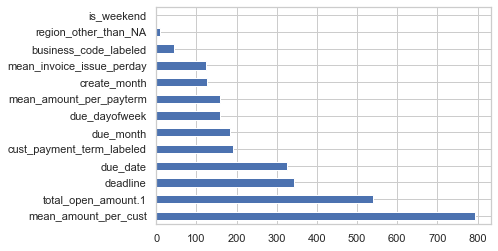

In [112]:
pd.Series(clf.feature_importances_, index=x_train.columns).nlargest(14).plot(kind='barh')

comparing the data side by side

In [113]:
check = pd.DataFrame(predicted,columns= ['delay_pred'])
check['delay_pred'] = np.round(check['delay_pred'])
check = pd.concat([check,y_val1.reset_index(drop = True)],axis=1)
check

,delay_pred,delay
0,-2.0,4.0
1,-2.0,3.0
2,-2.0,-3.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3392,-0.0,0.0
3393,1.0,1.0
3394,4.0,14.0
3395,-0.0,0.0


# Concatenating x_train, x_val1 and x_val2 to fit for x_test

In [114]:
x_train_full = pd.concat([x_train,x_val1,x_val2],axis=0)
y_train_full = pd.concat([y_train,y_val1,y_val2],axis=0)

In [115]:
x_train_full

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month
0,8885.57,15.0,1,14,0,0,25.0,1,0,1,22277.90,23214.94,12
1,23758.87,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12
2,32856.32,15.0,1,14,0,0,1.0,1,0,2,28990.66,37264.06,12
3,98118.31,15.0,1,14,0,0,3.0,1,0,3,41489.51,42822.29,12
4,18550.48,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46866,894.72,15.0,3,13,4,0,1.0,1,0,2,18649.56,37764.03,2
46867,15517.81,0.0,2,27,3,0,2.0,1,0,7,14504.31,14294.30,2
46868,25360.00,15.0,3,13,4,0,1.0,1,0,2,26176.75,37764.03,2
46870,14271.00,15.0,3,13,4,0,1.0,1,0,2,12692.22,37764.03,2


# Modeling main (predicting delay for x_test)

In [116]:
# Fitting Light GBM Regressor to the Training Set
clf = LGBMRegressor()
clf.fit(x_train_full, y_train_full)

# Predicting the val1 Set Results
predicted_test = clf.predict(x_test)

# Binning into delay buckets

In [117]:
x_test

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month
46828,14604.66,15.0,3,13,4,0,10.0,1,0,1,21463.23,22074.16,2
46829,18767.16,15.0,3,13,4,0,1.0,1,0,2,12481.87,39682.86,2
46830,67.29,15.0,3,13,4,0,2.0,1,0,2,3975.18,39682.86,2
46831,191.02,20.0,3,18,2,0,2.0,1,0,11,1592.33,22280.65,2
46832,11566.97,15.0,3,13,4,0,10.0,1,0,1,21463.23,22074.16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49840,8064.00,10.0,5,23,5,1,1.0,1,0,10,5707.80,26334.43,5
49841,136025.60,15.0,5,28,3,0,1.0,1,0,2,93187.27,39682.86,5
49842,4025.00,10.0,5,23,5,1,1.0,1,0,10,5707.80,26334.43,5
49843,77253.74,15.0,5,28,3,0,1.0,1,0,2,77253.74,39682.86,5


concatenating x_train with y_train and x_test with y_test

In [118]:
traindf = pd.concat([x_train_full, y_train_full],axis=1)
y_test = pd.DataFrame(np.round(predicted_test),columns=['delay'])
testdf = pd.concat([x_test.reset_index(), y_test],axis=1)
testdf.set_index('index',inplace=True, drop=True)
testdf.index.name = None
testdf

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month,delay
46828,14604.66,15.0,3,13,4,0,10.0,1,0,1,21463.23,22074.16,2,2.0
46829,18767.16,15.0,3,13,4,0,1.0,1,0,2,12481.87,39682.86,2,2.0
46830,67.29,15.0,3,13,4,0,2.0,1,0,2,3975.18,39682.86,2,2.0
46831,191.02,20.0,3,18,2,0,2.0,1,0,11,1592.33,22280.65,2,6.0
46832,11566.97,15.0,3,13,4,0,10.0,1,0,1,21463.23,22074.16,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49840,8064.00,10.0,5,23,5,1,1.0,1,0,10,5707.80,26334.43,5,3.0
49841,136025.60,15.0,5,28,3,0,1.0,1,0,2,93187.27,39682.86,5,2.0
49842,4025.00,10.0,5,23,5,1,1.0,1,0,10,5707.80,26334.43,5,3.0
49843,77253.74,15.0,5,28,3,0,1.0,1,0,2,77253.74,39682.86,5,1.0


In [119]:
traindf['delay'].max()

187.0

# delay_bucket

In [120]:
def convert_bucket(x):
    if x <= 15:
        return '0-15 days'
    elif x<=30:
        return '16-30 days'
    elif x<=45:
        return '31-45 days'
    elif x<=60:
        return '46-60 days'
    else:
        return '>60 days'

traindf['delay_bucket'] = traindf['delay'].apply(convert_bucket)
testdf['delay_bucket'] = testdf['delay'].apply(convert_bucket)

In [121]:
print(traindf['delay_bucket'].value_counts())
print('____________________________________')
print(testdf['delay_bucket'].value_counts())

0-15 days     45066
16-30 days      668
31-45 days      535
46-60 days      337
>60 days        228
Name: delay_bucket, dtype: int64
____________________________________
0-15 days     2991
31-45 days       9
46-60 days       7
16-30 days       3
>60 days         1
Name: delay_bucket, dtype: int64


# payment_predicted_date

In [122]:
due_date_traindf = pd.concat([pd.Series(due_date_train),pd.Series(due_date_val1),pd.Series(due_date_val2)])
due_date_testdf = pd.Series(due_date_test)
due_date_traindf

0       2019-01-14
1       2019-01-14
2       2019-01-14
3       2019-01-14
4       2019-01-14
           ...    
46866   2020-03-13
46867   2020-02-27
46868   2020-03-13
46870   2020-03-13
46877   2020-03-13
Name: due_in_date, Length: 46834, dtype: datetime64[ns]

In [123]:
traindf['due_in_date'] = due_date_traindf
testdf['due_in_date'] = due_date_testdf
traindf

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month,delay,delay_bucket,due_in_date
0,8885.57,15.0,1,14,0,0,25.0,1,0,1,22277.90,23214.94,12,-5.0,0-15 days,2019-01-14
1,23758.87,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12,1.0,0-15 days,2019-01-14
2,32856.32,15.0,1,14,0,0,1.0,1,0,2,28990.66,37264.06,12,2.0,0-15 days,2019-01-14
3,98118.31,15.0,1,14,0,0,3.0,1,0,3,41489.51,42822.29,12,1.0,0-15 days,2019-01-14
4,18550.48,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12,1.0,0-15 days,2019-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46866,894.72,15.0,3,13,4,0,1.0,1,0,2,18649.56,37764.03,2,0.0,0-15 days,2020-03-13
46867,15517.81,0.0,2,27,3,0,2.0,1,0,7,14504.31,14294.30,2,29.0,16-30 days,2020-02-27
46868,25360.00,15.0,3,13,4,0,1.0,1,0,2,26176.75,37764.03,2,3.0,0-15 days,2020-03-13
46870,14271.00,15.0,3,13,4,0,1.0,1,0,2,12692.22,37764.03,2,6.0,0-15 days,2020-03-13


In [124]:
temp = traindf['delay'].apply(lambda x: pd.Timedelta(x, unit='D'))
traindf['payment_predicted_date'] = traindf['due_in_date']+temp

In [125]:
temp1 = testdf['delay'].apply(lambda x: pd.Timedelta(x, unit='D'))
testdf['payment_predicted_date'] = testdf['due_in_date']+temp1

In [126]:
traindf

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month,delay,delay_bucket,due_in_date,payment_predicted_date
0,8885.57,15.0,1,14,0,0,25.0,1,0,1,22277.90,23214.94,12,-5.0,0-15 days,2019-01-14,2019-01-09
1,23758.87,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12,1.0,0-15 days,2019-01-14,2019-01-15
2,32856.32,15.0,1,14,0,0,1.0,1,0,2,28990.66,37264.06,12,2.0,0-15 days,2019-01-14,2019-01-16
3,98118.31,15.0,1,14,0,0,3.0,1,0,3,41489.51,42822.29,12,1.0,0-15 days,2019-01-14,2019-01-15
4,18550.48,15.0,1,14,0,0,3.0,1,0,1,35560.02,23214.94,12,1.0,0-15 days,2019-01-14,2019-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46866,894.72,15.0,3,13,4,0,1.0,1,0,2,18649.56,37764.03,2,0.0,0-15 days,2020-03-13,2020-03-13
46867,15517.81,0.0,2,27,3,0,2.0,1,0,7,14504.31,14294.30,2,29.0,16-30 days,2020-02-27,2020-03-27
46868,25360.00,15.0,3,13,4,0,1.0,1,0,2,26176.75,37764.03,2,3.0,0-15 days,2020-03-13,2020-03-16
46870,14271.00,15.0,3,13,4,0,1.0,1,0,2,12692.22,37764.03,2,6.0,0-15 days,2020-03-13,2020-03-19


In [127]:
testdf

,total_open_amount.1,deadline,due_month,due_date,due_dayofweek,is_weekend,mean_invoice_issue_perday,business_code_labeled,region_other_than_NA,cust_payment_term_labeled,mean_amount_per_cust,mean_amount_per_payterm,create_month,delay,delay_bucket,due_in_date,payment_predicted_date
46828,14604.66,15.0,3,13,4,0,10.0,1,0,1,21463.23,22074.16,2,2.0,0-15 days,2020-03-13,2020-03-15
46829,18767.16,15.0,3,13,4,0,1.0,1,0,2,12481.87,39682.86,2,2.0,0-15 days,2020-03-13,2020-03-15
46830,67.29,15.0,3,13,4,0,2.0,1,0,2,3975.18,39682.86,2,2.0,0-15 days,2020-03-13,2020-03-15
46831,191.02,20.0,3,18,2,0,2.0,1,0,11,1592.33,22280.65,2,6.0,0-15 days,2020-03-18,2020-03-24
46832,11566.97,15.0,3,13,4,0,10.0,1,0,1,21463.23,22074.16,2,2.0,0-15 days,2020-03-13,2020-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49840,8064.00,10.0,5,23,5,1,1.0,1,0,10,5707.80,26334.43,5,3.0,0-15 days,2020-05-23,2020-05-26
49841,136025.60,15.0,5,28,3,0,1.0,1,0,2,93187.27,39682.86,5,2.0,0-15 days,2020-05-28,2020-05-30
49842,4025.00,10.0,5,23,5,1,1.0,1,0,10,5707.80,26334.43,5,3.0,0-15 days,2020-05-23,2020-05-26
49843,77253.74,15.0,5,28,3,0,1.0,1,0,2,77253.74,39682.86,5,1.0,0-15 days,2020-05-28,2020-05-29
